In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
gray_images = []
h_images = []
labels = []
path = "../data/scale_10/"
for file in os.listdir(path):
    img = cv.imread(path+file)
    gray_images.append(cv.cvtColor(img, cv.COLOR_BGR2GRAY))
    h_images.append(cv.cvtColor(img, cv.COLOR_BGR2HSV)[:,:,0])
    labels.append(file.split("_")[0])

In [3]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

In [4]:
labels = np.array(labels)
gray_images = np.array(gray_images)/255
flattened_gray = np.array([g.reshape(-1) for g in gray_images])
h_images = np.array(h_images)/255
flattened_h = np.array([h.reshape(-1) for h in h_images])

In [6]:
N_VALIDATION = 264
N_TRAIN = 792
N_TEST = 132
idx = shuffle_along_axis(np.arange(N_VALIDATION+N_TRAIN+N_TEST), 0)

X_train_gray = flattened_gray[idx[:N_TRAIN+N_VALIDATION]]
X_train_h = flattened_h[idx[:N_TRAIN+N_VALIDATION]]
y_train = labels[idx[:N_TRAIN+N_VALIDATION]]

X_test_gray = flattened_gray[idx[N_TRAIN+N_VALIDATION:]]
X_test_h = flattened_h[idx[N_TRAIN+N_VALIDATION:]]
y_test = labels[idx[N_TRAIN+N_VALIDATION:]]

# Random Forest gray

In [5]:
model_gray = RandomForestClassifier(random_state=42)

In [8]:
model_gray.fit(X_train_gray, y_train)

RandomForestClassifier(random_state=42)

In [9]:
model_gray.score(X_test_gray, y_test)

0.8863636363636364

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay

[learning_curve] Training set sizes: [ 95 308 522 736 950]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.8min finished


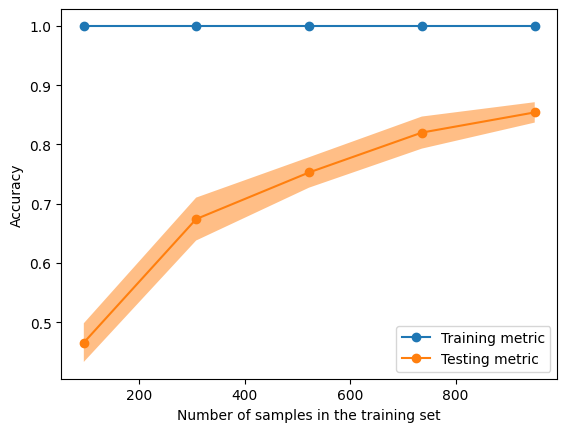

In [11]:
display = LearningCurveDisplay.from_estimator(model_gray, X_train_gray, y_train,
                                              verbose=1, random_state=0, score_name="Accuracy",
                                              score_type="both", line_kw={"marker": "o"}, 
                                              std_display_style="fill_between", cv=10)

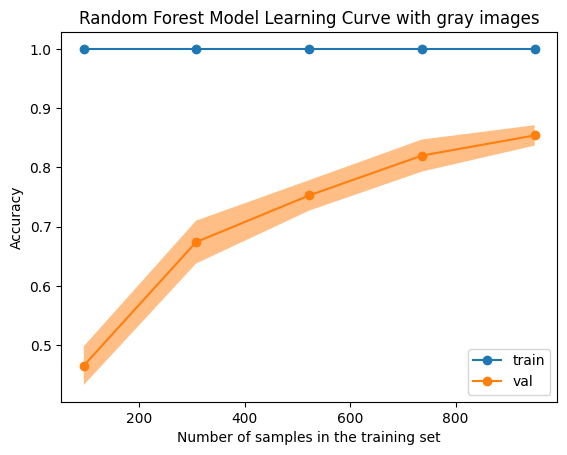

In [12]:
fig, ax = plt.subplots()
lc = LearningCurveDisplay(train_sizes=display.train_sizes, train_scores=display.train_scores,
                    test_scores=display.test_scores, score_name="Accuracy")
lc.plot(score_type="both", line_kw={"marker": "o"}, std_display_style="fill_between", ax=ax)
ax.legend(["train","val"])
ax.set_title("Random Forest Model Learning Curve with gray images")
fig.savefig("RF_gray_accuracy.png")

# Random forest hue

In [14]:
model_hue = RandomForestClassifier(random_state=42)
model_hue.fit(X_train_h, y_train)

RandomForestClassifier(random_state=42)

In [15]:
model_hue.score(X_test_h, y_test)

0.5681818181818182

[learning_curve] Training set sizes: [ 95 308 522 736 950]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished


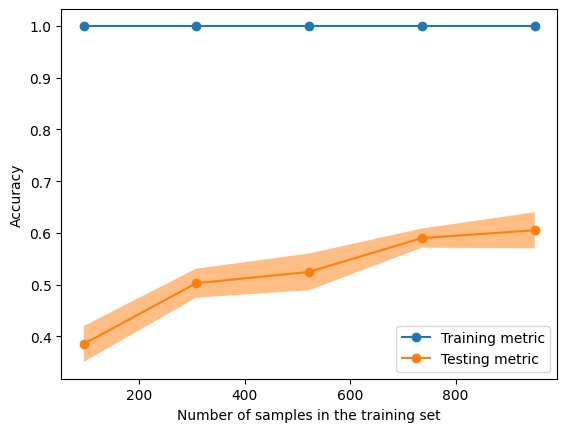

In [16]:
display_hue = LearningCurveDisplay.from_estimator(model_hue, X_train_h, y_train,
                                              verbose=1, random_state=0, score_name="Accuracy",
                                              score_type="both", line_kw={"marker": "o"}, 
                                              std_display_style="fill_between", cv=10)

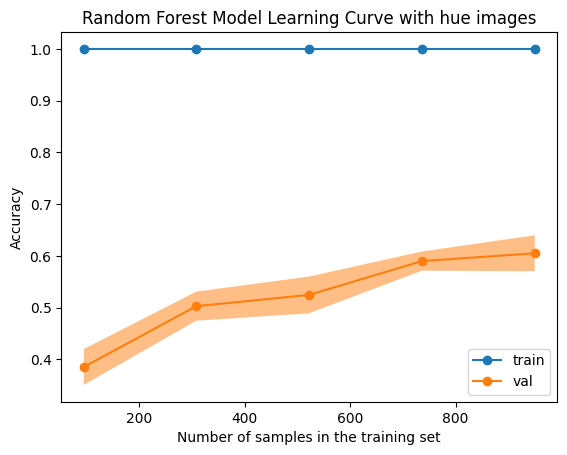

In [17]:
fig, ax = plt.subplots()
lc = LearningCurveDisplay(train_sizes=display_hue.train_sizes, train_scores=display_hue.train_scores,
                    test_scores=display_hue.test_scores, score_name="Accuracy")
lc.plot(score_type="both", line_kw={"marker": "o"}, std_display_style="fill_between", ax=ax)
ax.legend(["train","val"])
ax.set_title("Random Forest Model Learning Curve with hue images")
fig.savefig("RF_hue_accuracy.png")